In [1]:
from IPython.display import Image

In [11]:
import random
from merge_sort import merge_sort
from bubble_sort import bubble_sort
from selection_sort import selection_sort
from insertion_sort import insertion_sort
import time
from copy import deepcopy


n = 1000
a = list(range(n))
random.shuffle(a)
print("sorting {} numbers".format(n))


def test(f, nums):
    # print(nums[:10], "...")
    t = time.time()
    assert f(nums) == list(range(n)), "{} failed, {} {}".format(f, nums[:3], n)
    print("{:20} takes {}".format(f.__name__, time.time() - t))


for f in [insertion_sort, selection_sort, merge_sort, bubble_sort]:
    test(f, deepcopy(a))


sorting 1000 numbers
insertion_sort       takes 0.11751770973205566
selection_sort       takes 0.07132077217102051
merge_sort           takes 0.006657123565673828
bubble_sort          takes 0.27924609184265137


https://www.mathsisfun.com/games/towerofhanoi.html

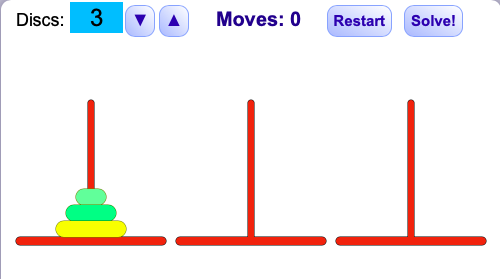

In [3]:
Image("hanoi.png")

In [4]:
def hanoi(n):
    """
    n = 3
    n hanoi, move from A to C
        move n-1 hanoi from A to B
        move last hanoi from A to C
        move n-1 hanoi from B to C
    """
    if n==1:
        return 1
    
    return hanoi(n-1) * 2 + 1

In [ ]:
1, 3, 7, ....

In [ ]:
2**n - 1  : O(1)

In [13]:
hanoi(2)

3

In [12]:
hanoi(3)

7

In [14]:
hanoi(10)

1023

In [15]:
def hanoi2(n):
    result = 1
    for i in range(1, n):
        result = result * 2 + 1
    return result


In [16]:
hanoi2(10)

1023

In [17]:
import timeit
print(timeit.timeit('hanoi(10)', number=1000, globals=globals()))
print(timeit.timeit('hanoi2(10)', number=1000, globals=globals()))

0.004681164980866015
0.002387137006735429


In [ ]:
print(timeit.timeit('hanoi(64)', number=1000, globals=globals()))
print(timeit.timeit('hanoi2(64)', number=1000, globals=globals()))

In [ ]:
def fib(n):
    if n <2:
        return n
    
    return fib(n-1) + fib(n-2)

In [ ]:
fib(20)

In [ ]:
def fib2(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

In [ ]:
print(timeit.timeit('fib(20)', number=1000, globals=globals()))
print(timeit.timeit('fib2(20)', number=1000, globals=globals()))

In [ ]:
# bineary search. need sort. (N*LOG(N))     search. (log(N))

In [ ]:
8, 3, 10

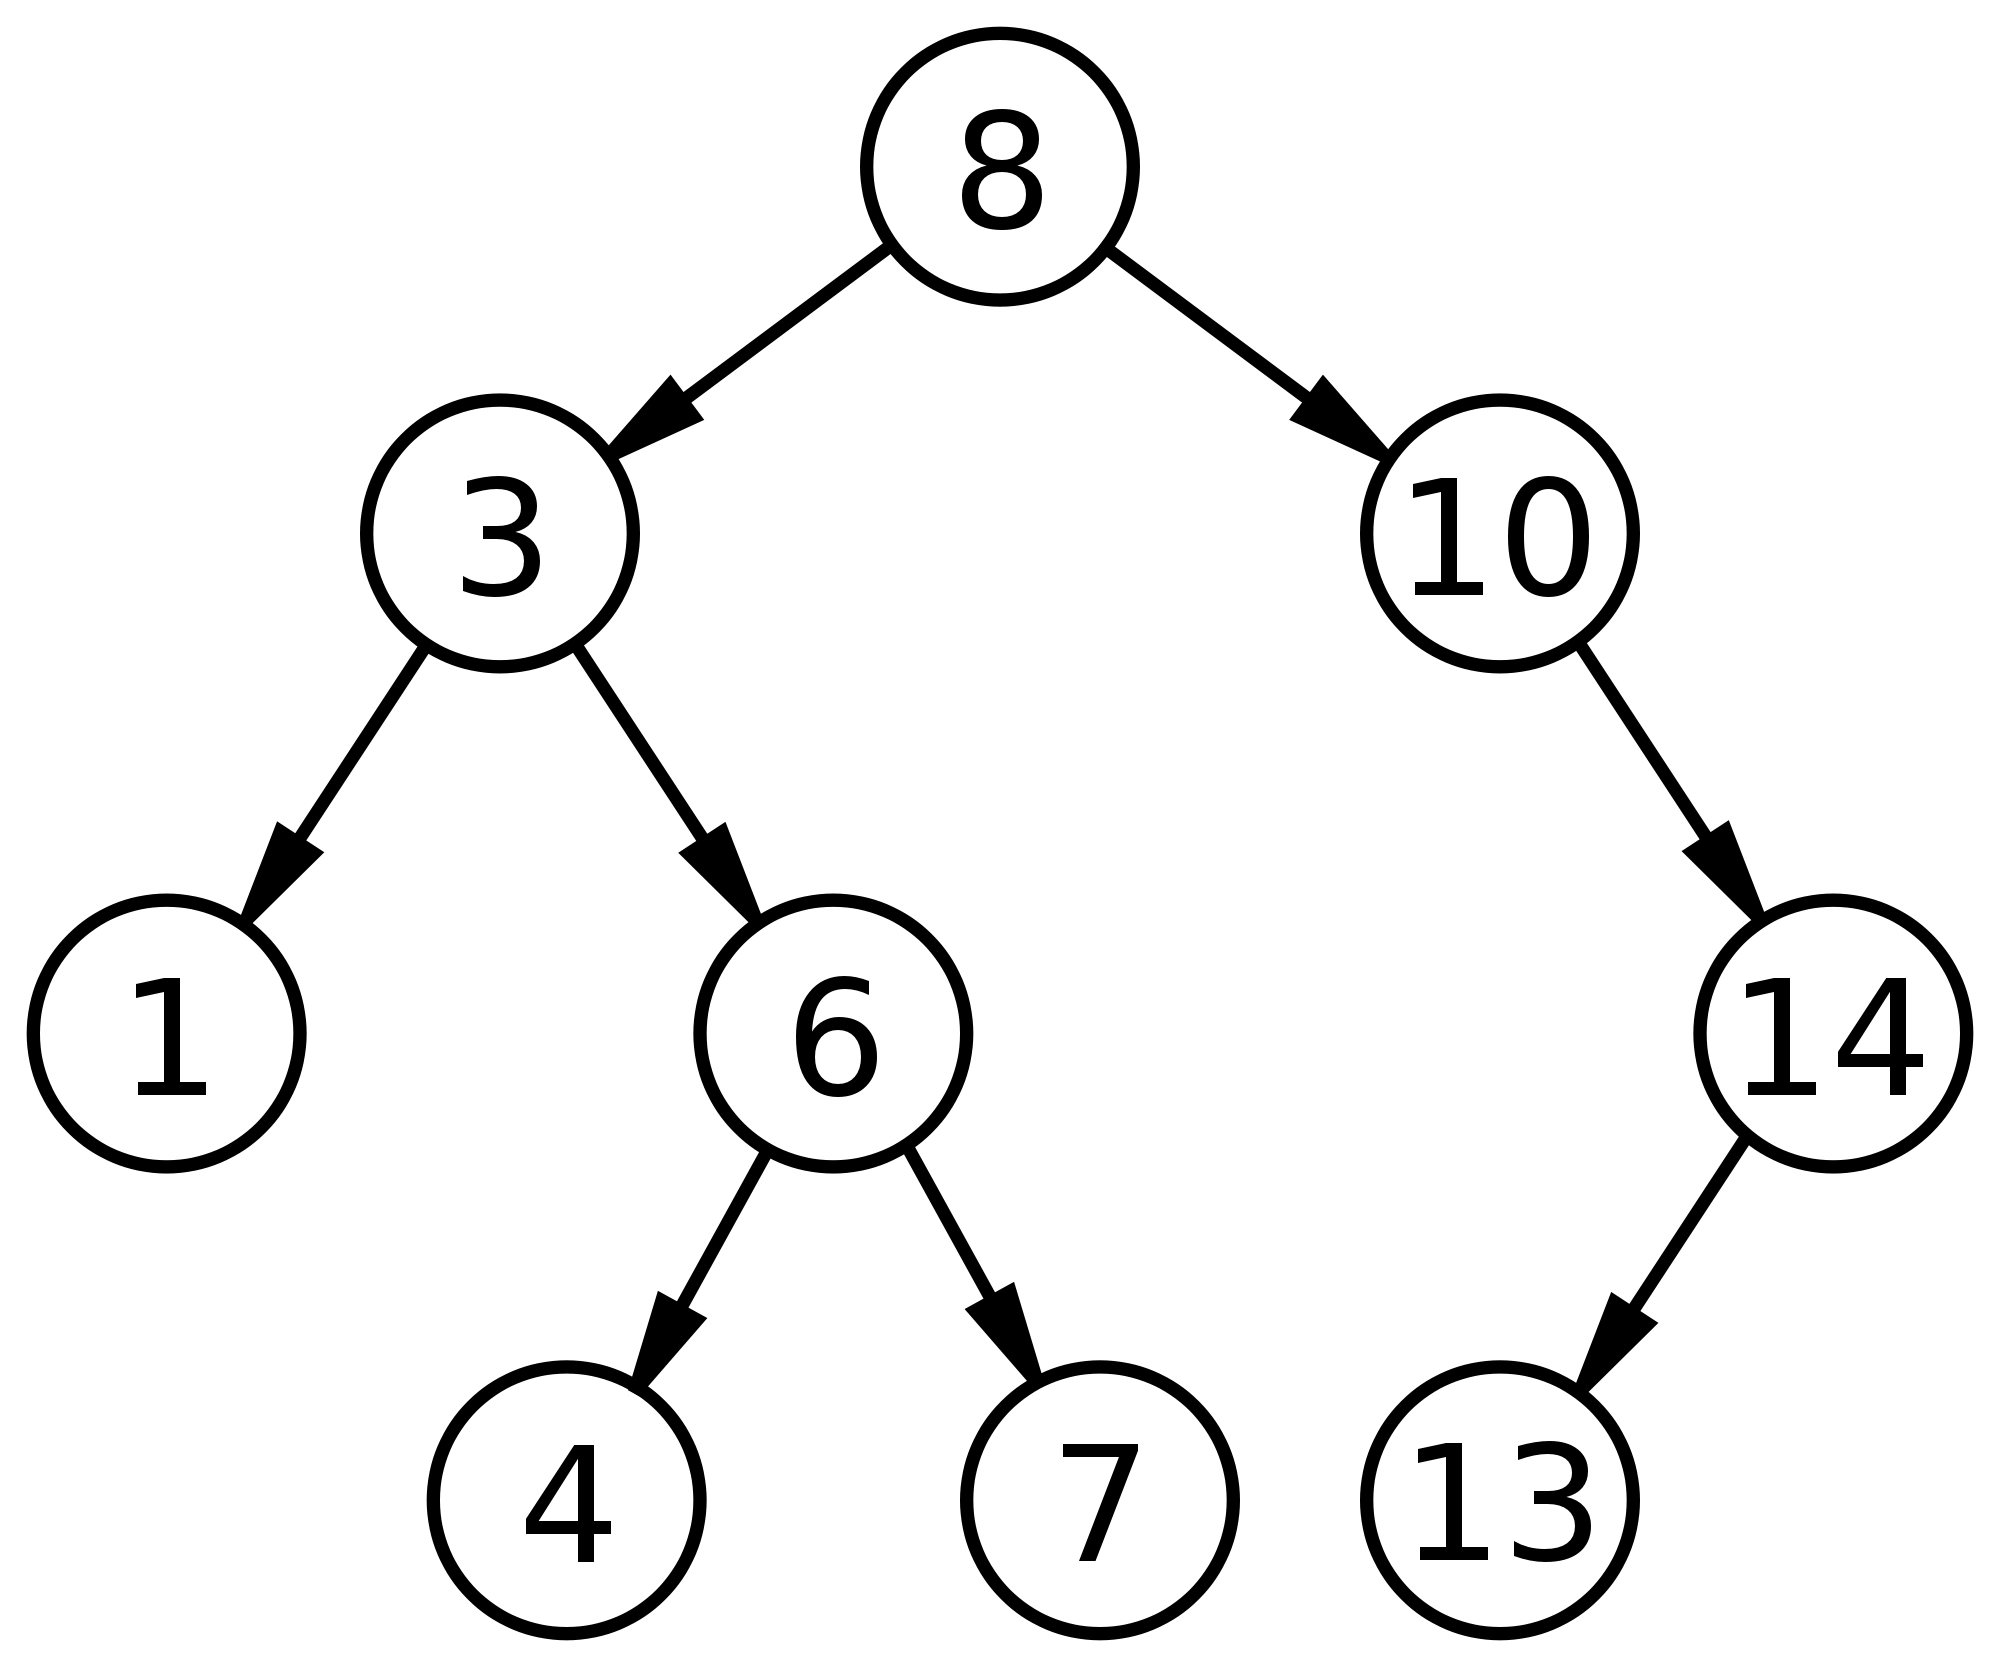

In [18]:
Image("bst.png")

In [19]:
# BST concept
# a tree is up side down.
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
    
    def __str__(self):
        return str(self.value)

class BST:
    def __init__(self):
        self.root = None
    
    def insert(self, new_val):
        # note it is easy to reference from parent to child, not the other way around.
        if not self.root:
            self.root = Node(new_val)
            return

        current = self.root
        
        while current:
            prev = current
            if new_val <= current.value:
                current = current.left
            else:
                current = current.right
                
        if new_val <= prev.value:
            prev.left = Node(new_val)
        else:
            prev.right = Node(new_val)
        
    @staticmethod
    def depth(root):
        if root is None:
            return 0
        return max(BST.depth(root.left), BST.depth(root.right)) + 1
    
    @staticmethod
    def is_balanced(root):
        return BST.depth(root.left) == BST.depth(root.right) 
    
            
    def pre_order(self):
        """ pre order traversal: root, left, right"""
        def _helper(root):
            if root is None:
                return

            print(root.value, end=" ")
            _helper(root.left)
            _helper(root.right)
            
        _helper(self.root)
        
    def search(self, find_val):
        current = self.root
        while current:
            if current.value == find_val:
                return True
            elif find_val < current.value:
                current = current.left
            else:
                current = current.right
        return False

In [ ]:
# [8, 3, 1, 6, 4, 7, 10, 14, 13]
# 7

In [25]:
t = BST()
_ = [ t.insert(i) for i in [8, 3, 1, 6, 4, 7, 10, 14, 13]]


In [28]:
t.pre_order()

8 3 1 6 4 7 10 14 13 

In [29]:
t.search(8)

True

In [30]:
t.depth(t.root)

4

In [31]:
t.is_balanced(t.root)

True

In [32]:
t.is_balanced(t.root.left)

False

In [33]:
t = BST()
[ t.insert(i) for i in range(10)]
t.pre_order()

0 1 2 3 4 5 6 7 8 9 

In [ ]:
# BST:
# total # of nodes:  2**N -1
# total layer: N
# log(N)
# avoid sorting. N*log(N) for general Purpose sorting. MergeSort, QSort, etc.